<a href="https://colab.research.google.com/github/Shamil2007/DataAnalysis/blob/main/traffic_data_analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.csv?accessType=DOWNLOAD

--2025-02-05 12:00:33--  https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.csv?accessType=DOWNLOAD
Resolving data.montgomerycountymd.gov (data.montgomerycountymd.gov)... 100.28.82.57, 174.129.43.10, 35.170.133.124
Connecting to data.montgomerycountymd.gov (data.montgomerycountymd.gov)|100.28.82.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [  <=>               ] 804.35M  1.02MB/s    in 11m 23s 

2025-02-05 12:11:57 (1.18 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [843423866]



In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [206]:
df = pd.read_csv("/content/rows.csv?accessType=DOWNLOAD", low_memory=False)
df

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,93734695-93e6-4c69-bcf2-d0d9ee47286a,10/24/2024,13:30:00,MCP,"3rd District, Silver Spring",EXCEEDING POSTED MAXIMUM SPEED LIMIT: 60 MPH I...,NEW HAMPSHIRE AVE / VALLEY BROOK,39.058970,-76.997734,No,...,21-801.1,Transportation Article,False,BLACK,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.0589701666667, -76.997734)"
1,20b92176-702a-4071-85e5-43ac0c994529,10/24/2024,04:35:00,MCP,"4th District, Wheaton",DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,RANDOLPH RD @ JUDSON RD,39.058199,-77.054977,No,...,21-202(h1),Transportation Article,False,HISPANIC,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.058199, -77.0549773333333)"
2,fdf2e5b6-bd2c-4bfc-be33-2ae32e82657c,10/24/2024,08:23:00,MCP,"2nd District, Bethesda",DRIVER FAILURE TO STOP FOR PEDESTRIAN IN CROSS...,BRADLEY/ FAIRFAX,38.977576,-77.100526,No,...,21-502(a2),Transportation Article,False,WHITE,F,WASHINGTON,DC,DC,A - Marked Patrol,"(38.9775758333333, -77.1005258333333)"
3,42de2c93-f9b4-4154-b5d0-20106e849909,10/23/2024,22:27:00,MCP,"3rd District, Silver Spring",DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUI...,GEORGIA AVE/WAYNE AVE,38.993102,-77.026927,No,...,16-101(a1),Transportation Article,False,HISPANIC,M,WASHINGTON,DC,MD,A - Marked Patrol,"(38.9931023333333, -77.0269273333333)"
4,f2dc85fa-311f-444c-af79-e1696e495190,10/24/2024,21:13:00,MCP,"3rd District, Silver Spring",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,GEORGIA AVE/13TH ST,39.069426,-77.162020,No,...,22-204(f),Transportation Article,False,BLACK,M,WASHINGTON,DC,DC,A - Marked Patrol,"(39.0694258333333, -77.1620203333333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983588,7443fc19-bb22-4d8b-a73d-61325e6c6269,03/04/2016,20:11:00,MCP,"3rd District, Silver Spring",TAG LIGHTS (*),SLIGO AVE. @ FENTON ST.,38.990353,-77.024982,No,...,65*,NaN,False,HISPANIC,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9903533333333, -77.0249816666667)"
1983589,15046153-2c14-4c90-8fba-05cc3e178079,11/14/2018,23:21:00,MCP,"5th District, Germantown",HEADLIGHTS (*),DARNESTOWN RD @TRAVILLE GATEWAY DR,39.095365,-77.199667,No,...,55*,NaN,False,WHITE,F,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.095365, -77.1996666666667)"
1983590,9ab3f931-1506-400c-b23b-0f1fc567cc89,05/21/2019,22:06:00,MCP,"3rd District, Silver Spring",HEADLIGHTS (*),NEW HAMPSHIRE/VENICE DR,0.000000,0.000000,No,...,55*,NaN,False,HISPANIC,M,HYATTSVILLE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1983591,ae19cf7b-3eef-4341-b370-04e5f1a7a558,07/02/2017,13:19:00,MCP,"6th District, Gaithersburg / Montgomery Village",STOP LIGHTS (*),MIDCOUNTY HWY @ WASHINGTON GROVE,39.143907,-77.162000,No,...,64*,NaN,False,WHITE,F,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1439066666667, -77.162)"


In [207]:
df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'])

In [208]:
df['Time Of Stop'] = pd.to_datetime(df['Time Of Stop'])

<ipython-input-208-f5614a00a1f1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time Of Stop'] = pd.to_datetime(df['Time Of Stop'])


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983593 entries, 0 to 1983592
Data columns (total 43 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   SeqID                    object        
 1   Date Of Stop             datetime64[ns]
 2   Time Of Stop             datetime64[ns]
 3   Agency                   object        
 4   SubAgency                object        
 5   Description              object        
 6   Location                 object        
 7   Latitude                 float64       
 8   Longitude                float64       
 9   Accident                 object        
 10  Belts                    object        
 11  Personal Injury          object        
 12  Property Damage          object        
 13  Fatal                    object        
 14  Commercial License       object        
 15  HAZMAT                   object        
 16  Commercial Vehicle       object        
 17  Alcohol                  ob

In [210]:
df.isna().sum()

,0
SeqID,0
Date Of Stop,0
Time Of Stop,0
Agency,0
SubAgency,0
Description,10
Location,4
Latitude,0
Longitude,0
Accident,0


In [211]:
df.describe()

,Date Of Stop,Time Of Stop,Latitude,Longitude,Year
count,1983593,1983593,1.983593e+06,1.983593e+06,1.973072e+06
mean,2017-04-04 06:25:23.754923264,2025-02-05 13:22:11.961323776,3.626704e+01,-7.155663e+01,2.007289e+03
min,2012-01-01 00:00:00,2025-02-05 00:00:00,0.000000e+00,-1.512560e+02,0.000000e+00
25%,2014-09-06 00:00:00,2025-02-05 08:16:00,3.901676e+01,-7.719211e+01,2.003000e+03
50%,2016-11-07 00:00:00,2025-02-05 13:52:00,3.906582e+01,-7.708608e+01,2.008000e+03
75%,2019-03-24 00:00:00,2025-02-05 19:49:00,3.913385e+01,-7.702697e+01,2.013000e+03
max,2025-02-04 00:00:00,2025-02-05 23:59:00,4.154316e+01,3.906444e+01,9.999000e+03
std,NaN,NaN,1.010880e+01,1.994529e+01,8.593849e+01


#Which years had the highest and lowest number of violations (accidents, speeding, etc.)?

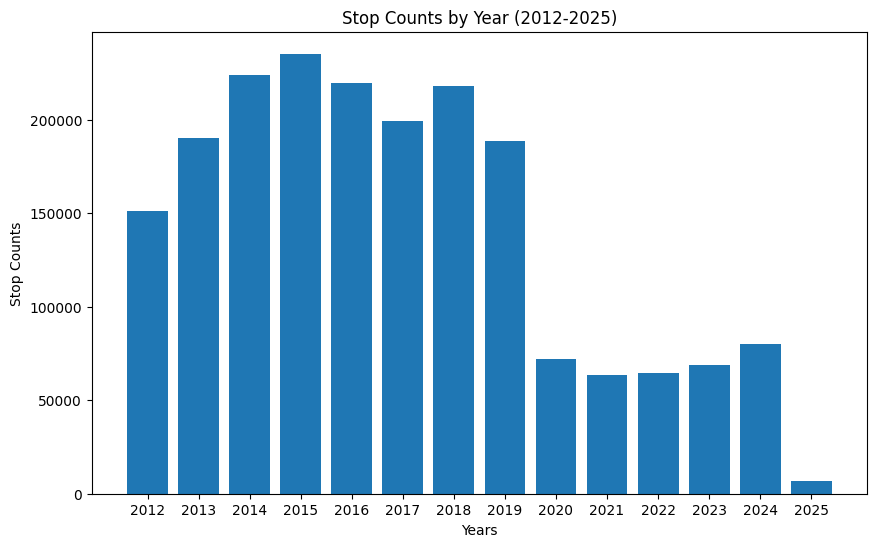

In [212]:
df['Year'] = df['Date Of Stop'].dt.year

year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(year_counts.index, year_counts.values)

plt.xlabel('Years')
plt.ylabel('Stop Counts')
plt.title('Stop Counts by Year (2012-2025)')

plt.xticks([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025])
plt.show()

Between 2012 and 2019, the violation count exceeded 150,000. However, by 2025, it has decreased significantly, reaching around 70,000 (excluding 2025).

#Which months of the year had the highest and lowest number of accidents?

In [213]:
accident_df = df[df['Accident'] == 'Yes']

top_3_months = accident_df['Date Of Stop'].dt.month.value_counts().head(3) - 4000
least_3_months = accident_df['Date Of Stop'].dt.month.value_counts().tail(3) - 4000

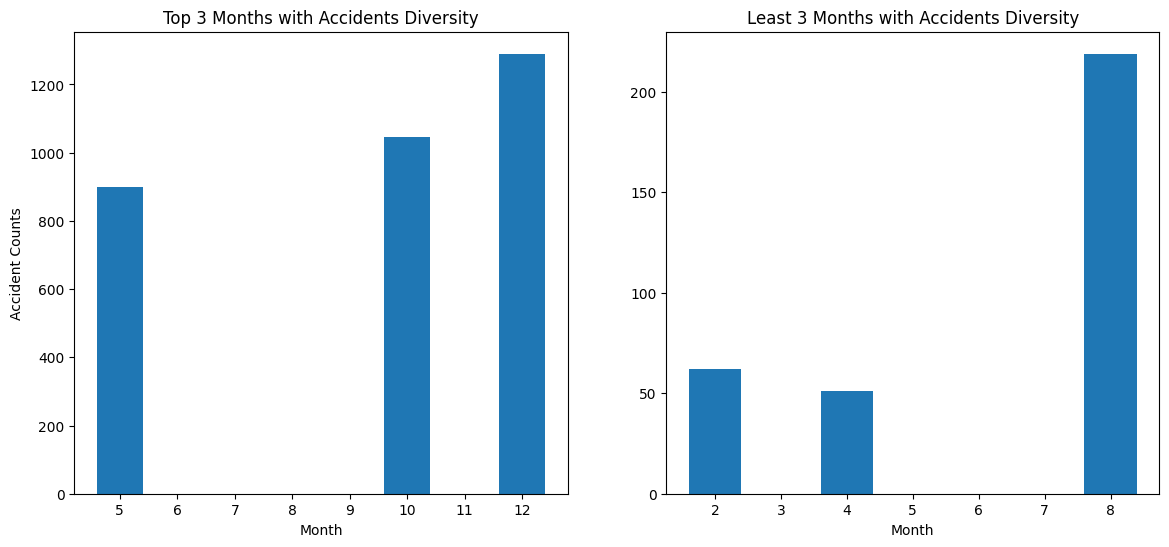

In [214]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(top_3_months.index, top_3_months.values)
plt.title('Top 3 Months with Accidents Diversity')
plt.xlabel('Month')
plt.ylabel('Accident Counts')
plt.xticks(range(5, 13))

plt.subplot(1, 2, 2)
plt.bar(least_3_months.index, least_3_months.values)
plt.title('Least 3 Months with Accidents Diversity')
plt.xlabel('Month')
plt.xticks(range(2, 9))

plt.show()

Accidents tend to occur more frequently in May, October, and December, while February, April, and August see the fewest accidents.

#During which hours did most and least violations occur?

In [215]:
import matplotlib.pyplot as plt

top_3_hours = df['Time Of Stop'].dt.hour.value_counts().head(3)

least_3_hours = df['Time Of Stop'].dt.hour.value_counts().tail(3)

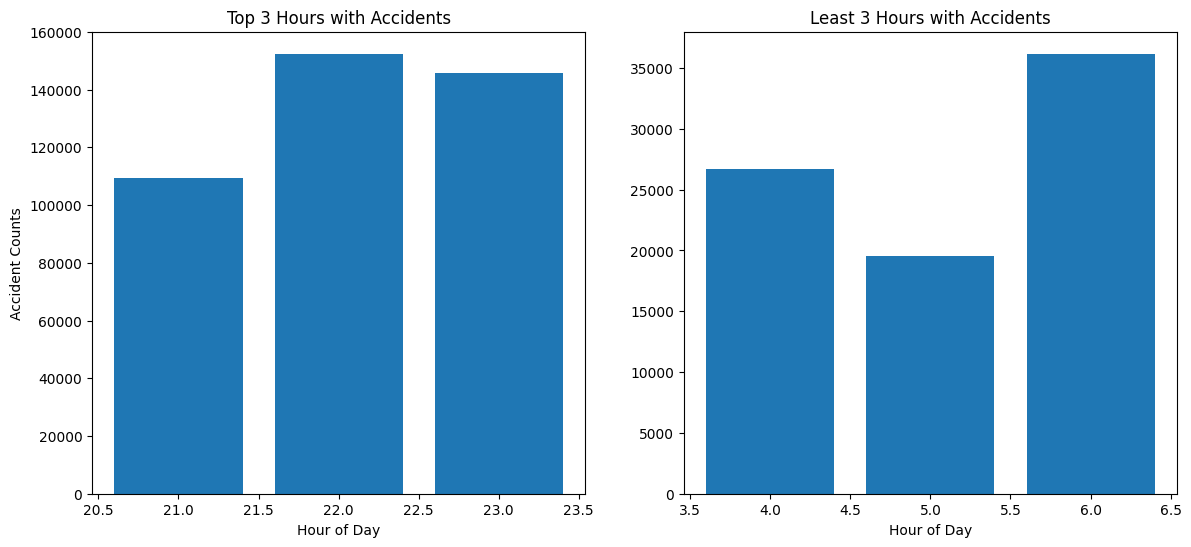

In [216]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(top_3_hours.index, top_3_hours.values)
plt.title('Top 3 Hours with Accidents')
plt.xlabel('Hour of Day')
plt.ylabel('Accident Counts')

plt.subplot(1, 2, 2)
plt.bar(least_3_hours.index, least_3_hours.values)
plt.title('Least 3 Hours with Accidents')
plt.xlabel('Hour of Day')

plt.show()

From 21:00 to 24:00, most violations occur, likely due tiredness, and increased nightlife activity. Between 15:00 and 19:00, the least violations happen, possibly because people are more alert after the midday break and there is less traffic during this time.

#Which specific locations are the most dangerous for drivers?

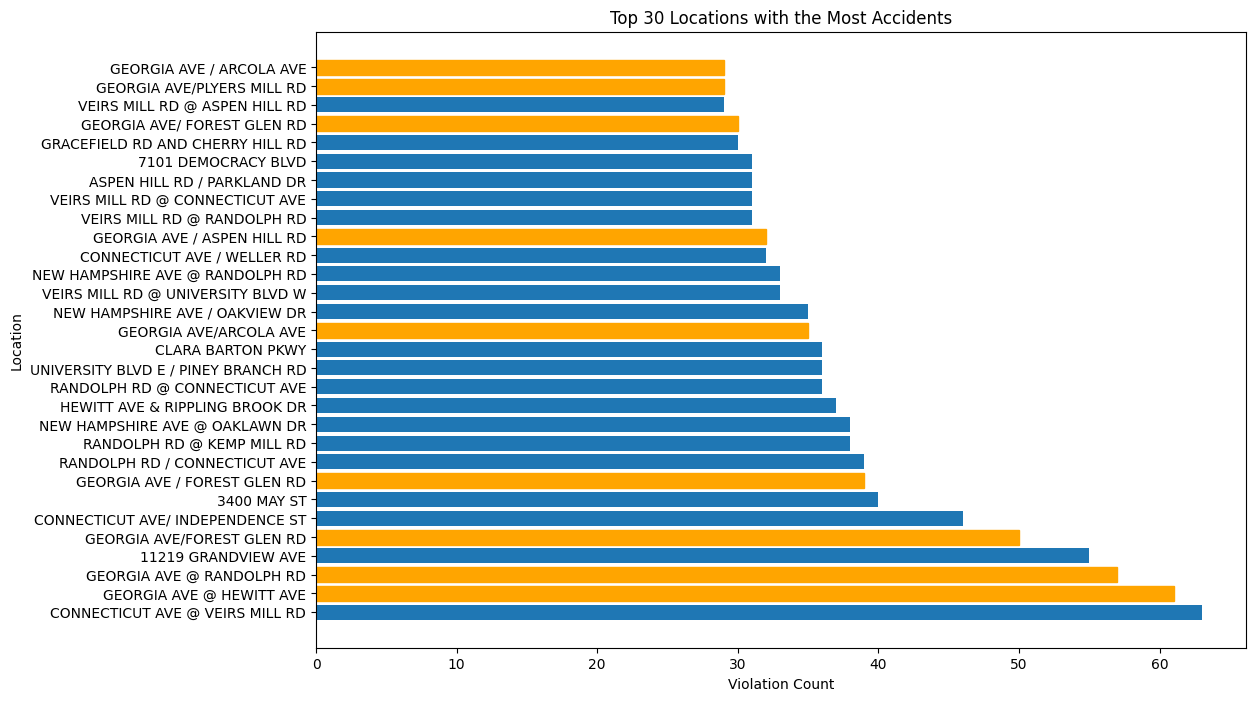

In [217]:
location_counts = df[df['Accident'] == 'Yes']['Location'].value_counts().head(30)

location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Violation Count']

location_df = location_df.sort_values(by='Violation Count', ascending=False)

plt.figure(figsize=(12, 8))

bars = plt.barh(location_df['Location'], location_df['Violation Count'])

for bar, location in zip(bars, location_df['Location']):
    if 'GEORGIA AVE' in location:
        bar.set_color('orange')

plt.xlabel('Violation Count')
plt.ylabel('Location')
plt.title('Top 30 Locations with the Most Accidents')

plt.show()

Certain street intersections experience the most accidents, particularly those intersecting with Georgia Ave, which is marked in yellow.

#In accidents involving personal injury, did people wear seat belts?

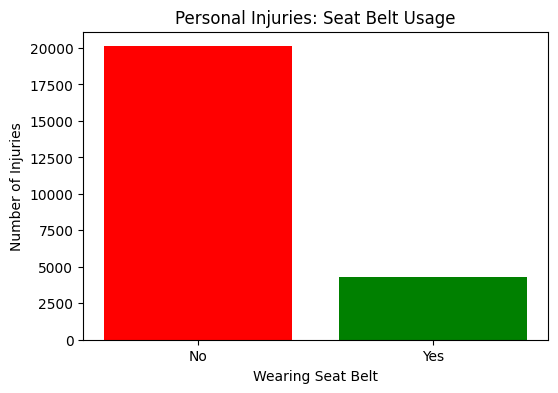

In [218]:
injury_belt_counts = df[df['Personal Injury'] == 'Yes']['Belts'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(injury_belt_counts.index, injury_belt_counts.values, color=['red', 'green'])

plt.xlabel('Wearing Seat Belt')
plt.ylabel('Number of Injuries')
plt.title('Personal Injuries: Seat Belt Usage')

plt.show()

In [219]:
belt_usage_injury = round(df[(df['Personal Injury'] == 'Yes') & (df['Belts'] == 'Yes')].shape[0] / df[df['Personal Injury'] == 'Yes']['Belts'].shape[0] * 100, 1)
print(f"The plot shows that only {belt_usage_injury}% of people with personal injuries were wearing a seatbelt, which is quite concerning.")

The plot shows that only 17.5% of people with personal injuries were wearing a seatbelt, which is quite concerning.


#In accidents involving property damage, was alcohol a factor?

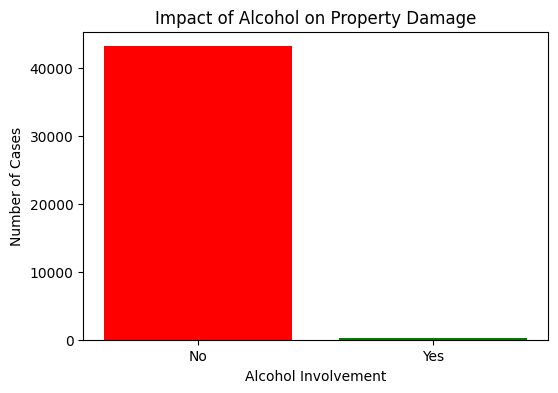

In [220]:
damage_alchol_counts = df[df['Property Damage'] == 'Yes']['Alcohol'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(damage_alchol_counts.index, damage_alchol_counts.values, color=['red', 'green'])

plt.xlabel('Alcohol Involvement')
plt.ylabel('Number of Cases')
plt.title('Impact of Alcohol on Property Damage')

plt.show()

In [221]:
alchol_property_damage = round(df[(df['Property Damage'] == 'Yes') & (df['Alcohol'] == 'Yes')].shape[0] / df[df['Property Damage'] == 'Yes']['Belts'].shape[0] * 100, 1)
print(f"The plot shows that only {alchol_property_damage}% of alcohol-involved individuals caused property damage, which is a positive trend for now.")

The plot shows that only 0.7% of alcohol-involved individuals caused property damage, which is a positive trend for now.


#Which 5 years had the most alcohol-related incidents and unbelted drivers?

In [222]:
belts_no_counts = df[df['Belts'] == 'No']['Date Of Stop'].dt.year.value_counts().head(5).sort_index()

alcohol_no_counts = df[df['Alcohol'] == 'Yes']['Date Of Stop'].dt.year.value_counts().head(5).sort_index()

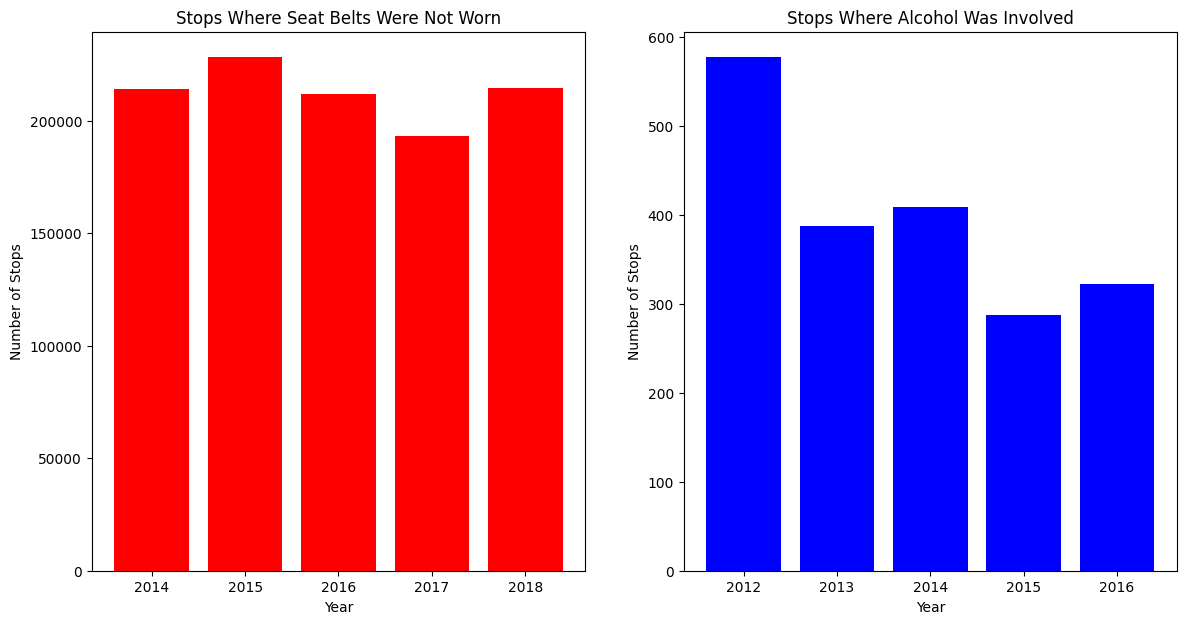

In [223]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.bar(belts_no_counts.index, belts_no_counts.values, color='red')
plt.xlabel('Year')
plt.ylabel('Number of Stops')
plt.title('Stops Where Seat Belts Were Not Worn')

plt.subplot(1, 2, 2)
plt.bar(alcohol_no_counts.index, alcohol_no_counts.values, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Stops')
plt.title('Stops Where Alcohol Was Involved')

plt.show()

The first plot shows that between 2014 and 2018, the highest number of stops occurred due to seatbelt violations. The second plot shows that between 2012 and 2016, the most stops were made due to alcohol-related offenses.


#In fatal accidents, were victims wearing seat belts, or were they under the influence?


In [224]:
fatal_accidents = df[df['Fatal'] == 'Yes']

seat_belts_worn = fatal_accidents[fatal_accidents['Belts'] == 'Yes']['Belts'].count()
seat_belts_not_worn = fatal_accidents[fatal_accidents['Belts'] == 'No']['Belts'].count()

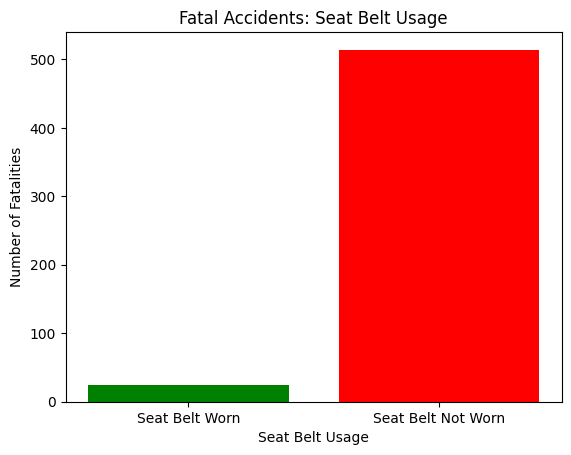

In [225]:
plt.bar(['Seat Belt Worn', 'Seat Belt Not Worn'], [seat_belts_worn, seat_belts_not_worn], color=['green', 'red'])
plt.xlabel('Seat Belt Usage')
plt.ylabel('Number of Fatalities')
plt.title('Fatal Accidents: Seat Belt Usage')

plt.show()

In [226]:
fatal_not_worn_belt = round(fatal_accidents[fatal_accidents['Belts'] == 'No']['Belts'].count() / fatal_accidents.shape[0] * 100, 1)
print(f"The plot shows that in fatal accidents, {fatal_not_worn_belt}% of individuals were not wearing their seatbelts, which is a significantly high percentage. This highlights a critical safety issue, as seatbelt usage plays a major role in preventing fatalities and reducing the severity of injuries during accidents")

The plot shows that in fatal accidents, 95.4% of individuals were not wearing their seatbelts, which is a significantly high percentage. This highlights a critical safety issue, as seatbelt usage plays a major role in preventing fatalities and reducing the severity of injuries during accidents


#What percentage of drivers without a commercial license were operating commercial vehicles?

In [227]:
noLicense_CommercialVehicle = df[(df['Commercial License'] == 'No') & (df['Commercial Vehicle'] == 'Yes')].shape[0]
total = df[df['Commercial Vehicle'] == 'Yes'].shape[0]
per_noLicense_CommercialVehicle = round(noLicense_CommercialVehicle / total * 100, 1)

In [228]:
print(f"According to the data, {per_noLicense_CommercialVehicle}% of drivers without a commercial license were found operating commercial vehicles. This highlights a concerning trend, as driving a commercial vehicle without the proper license poses significant safety risks and violates legal requirements.")

According to the data, 72.0% of drivers without a commercial license were found operating commercial vehicles. This highlights a concerning trend, as driving a commercial vehicle without the proper license poses significant safety risks and violates legal requirements.


#Which states had the highest number of violations and which years had the most violations for a specific city?

In [229]:
df['State'].value_counts().head(3)

,count
State,
MD,1722999
VA,92842
DC,49362


MD has a significantly higher number of violations compared to VA and DC, with a large difference in the violation count.

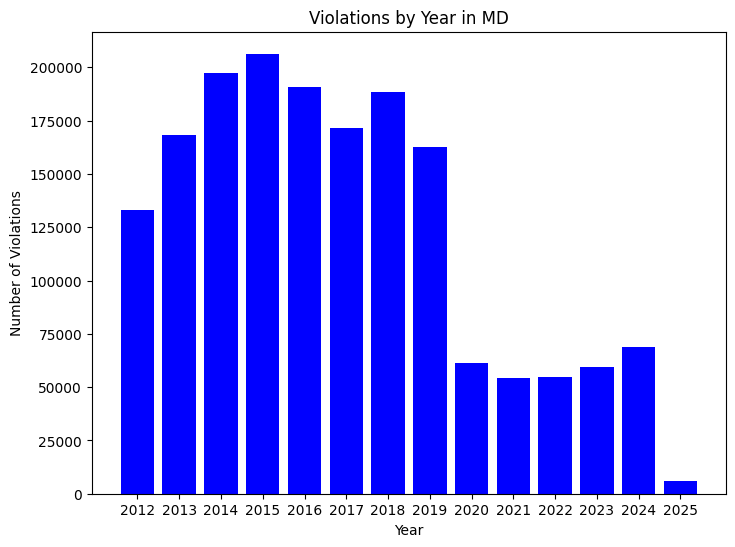

In [230]:
specific_state = df['State'].value_counts().index[0]
state_years = df[df['State'] == specific_state]['Date Of Stop'].dt.year.value_counts().sort_index()

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 2)
plt.bar(state_years.index, state_years.values, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.title(f'Violations by Year in {specific_state}')
plt.xticks(range(2012, 2026))

plt.show()

The plot shows that between 2013 and 2019, most violations occurred in MD, with an average of 190,000 violations for these years

#Which car models are involved in the most violations?

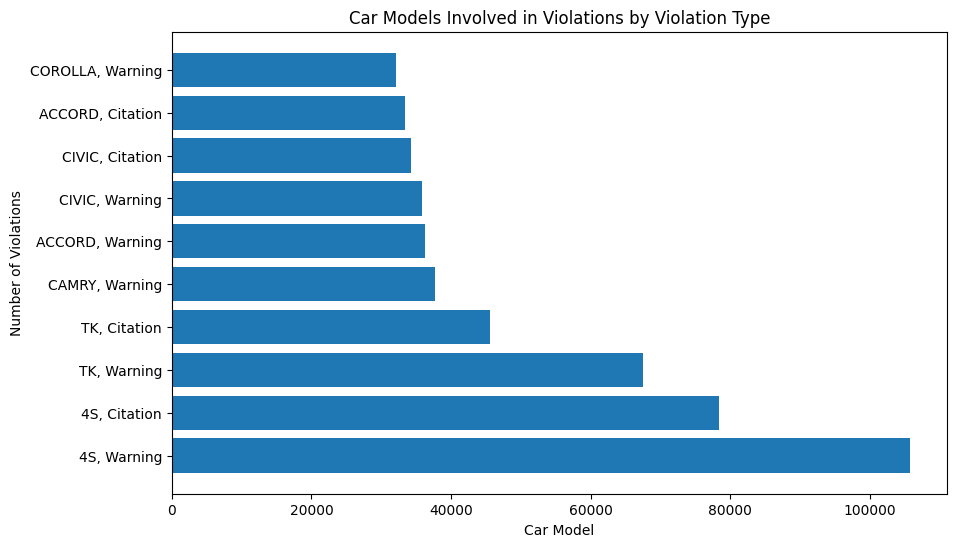

In [231]:
model_violation_counts = df.groupby(['Model', 'Violation Type']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(model_violation_counts['Model'] + ', ' + model_violation_counts['Violation Type'], model_violation_counts['count'])

plt.xlabel('Car Model')
plt.ylabel('Number of Violations')
plt.title('Car Models Involved in Violations by Violation Type')

plt.show()

The 4S car model is involved in the most violations for warnings


#Where do most violations occur based on Driver City and State?

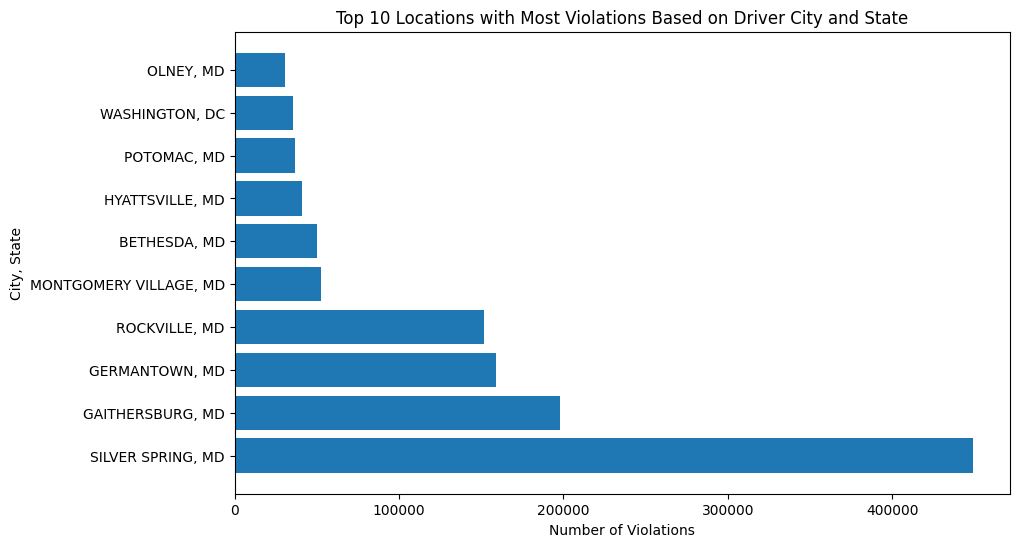

In [232]:
violation_counts = df.groupby(['Driver City', 'State']).size().reset_index(name='Violation Count').sort_values(by='Violation Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(violation_counts['Driver City'] + ', ' + violation_counts['State'], violation_counts['Violation Count'])

plt.xlabel('Number of Violations')
plt.ylabel('City, State')
plt.title('Top 10 Locations with Most Violations Based on Driver City and State')

plt.show()

The plot shows that Silver Spring, MD, has the most violations, exceeding 400,000.

#What are the top reasons for police searches during violations?

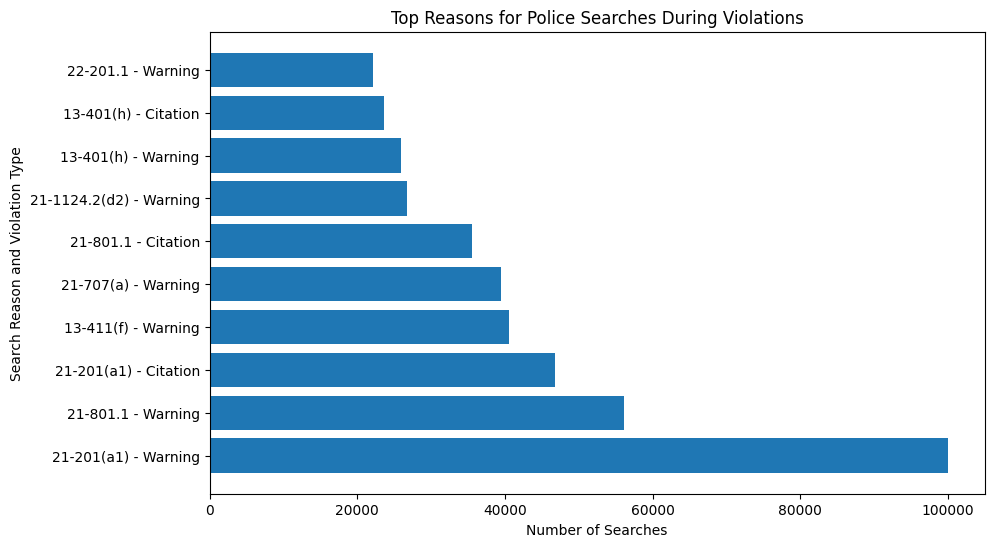

In [233]:
search_reason_counts = df.groupby(['Search Reason For Stop', 'Violation Type']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(search_reason_counts['Search Reason For Stop'] + ' - ' + search_reason_counts['Violation Type'], search_reason_counts['Count'])

plt.xlabel('Number of Searches')
plt.ylabel('Search Reason and Violation Type')
plt.title('Top Reasons for Police Searches During Violations')

plt.show()

The top reason for police searches during violations is 21-201(a1) - warning, with around 100,000 instances.


#Which Arrest Type is most commonly associated with accidents, and how does it vary by time of day?

In [234]:
df[df['Accident'] == 'Yes']['Arrest Type'].value_counts().head(1)

,count
Arrest Type,
A - Marked Patrol,52181


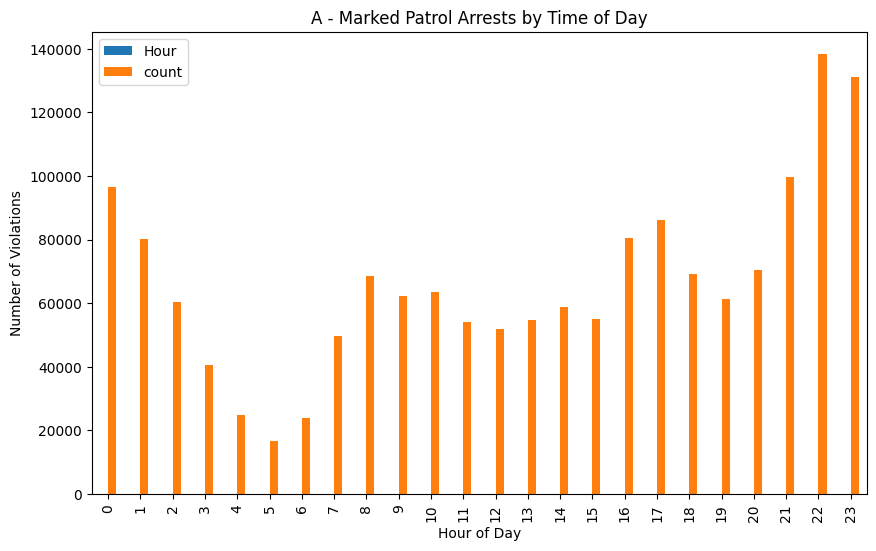

In [235]:
df['Hour'] = df['Time Of Stop'].dt.hour

marked_patrol = df[df['Arrest Type'] == 'A - Marked Patrol']

patrol_hour_counts = marked_patrol.groupby('Hour').size().reset_index(name='count')

patrol_hour_counts.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Hour of Day')
plt.ylabel('Number of Violations')
plt.title('A - Marked Patrol Arrests by Time of Day')

plt.show()

The plot shows that A-Marked Patrol incidents occurred the least between 16:00 and 17:00, while the highest number of incidents happened between 22:00 and 24:00.
